In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from importlib import reload
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from os import getcwd
import cv2
from sklearn.metrics import pairwise_distances

In [3]:
import utils
reload(utils)

Using TensorFlow backend.


<module 'utils' from 'C:\\Users\\Smit\\ds5230_2020_project\\utils.py'>

In [4]:
PROJECT_PATH = getcwd()
PICKLE_PATH = PROJECT_PATH + "\\pickles\\"

# Loading Train and Test Images

In [5]:
train_images = utils.open_pickle(file = PICKLE_PATH + "train_images" )
train_images_idx = utils.open_pickle(file = PICKLE_PATH + "train_images_names")

test_images = utils.open_pickle(file = PICKLE_PATH + "test_images")
test_images_idx = utils.open_pickle(file = PICKLE_PATH + "test_images_names")

In [6]:
IMG_DIMENSION = train_images[0].shape
print(IMG_DIMENSION)
FLATTEN_IMG_SIZE = IMG_DIMENSION[0]*IMG_DIMENSION[1]*IMG_DIMENSION[2]
print(FLATTEN_IMG_SIZE)

(80, 60, 3)
14400


In [7]:
print("Total images in database: %d"%train_images.shape[0])

Total images in database: 10796


# Loading Embeddings for Train and Test Images

In [8]:
train_images_embd = utils.open_pickle(PICKLE_PATH + "train_images_embd")
test_images_emb = utils.open_pickle(PICKLE_PATH + "test_images_embd")

# Loading Precomputed Variables

In [9]:
optimal_metrics = utils.open_pickle(PICKLE_PATH + "optimal_metrics")
MAX_PCA_COMPONENTS = optimal_metrics['MAX_PCA_COMPONENTS']
KMeans_CLUSTERS = optimal_metrics['K-MEANS_CLUSTERS']
GMM_CLUSTERS = optimal_metrics['GMM_CLUSTERS']

# Loading PCA and Clustering Method objects

In [10]:
pca_fit = utils.open_pickle(PICKLE_PATH + "pca_fit_%s_components"%str(MAX_PCA_COMPONENTS))

kmeans_pca_fit = utils.open_pickle(PICKLE_PATH + "K-Means_PCA_%scomponents_%sclusters"%(str(MAX_PCA_COMPONENTS),
                                                                                    str(KMeans_CLUSTERS)))

gmm_pca_fit = utils.open_pickle(PICKLE_PATH + "GMM_PCA_%scomponents_%sclusters"%(str(MAX_PCA_COMPONENTS),
                                                                                    str(GMM_CLUSTERS)))

In [11]:
pca_transf_train_images = train_images.reshape((train_images.shape[0], FLATTEN_IMG_SIZE))
pca_transf_train_images = pca_transf_train_images/255.0 # normalizing image
pca_transf_train_images = pca_fit.transform(pca_transf_train_images)

In [12]:
print("Dimension of image after PCA Transformation: %d"%pca_transf_train_images.shape[1])

Dimension of image after PCA Transformation: 145


In [13]:
# Removing ticks and labels from image plot to get a border
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.labelleft'] = False

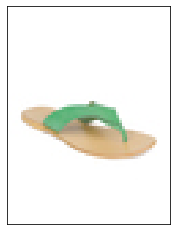

In [20]:
idx = 109
input_image = test_images[idx]
#input_image = cv2.imread("test_image.jpg")
ax = utils.plot_images([input_image], axis_style='on')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("Outputs/test_input_%d.jpg"%idx)
plt.show()

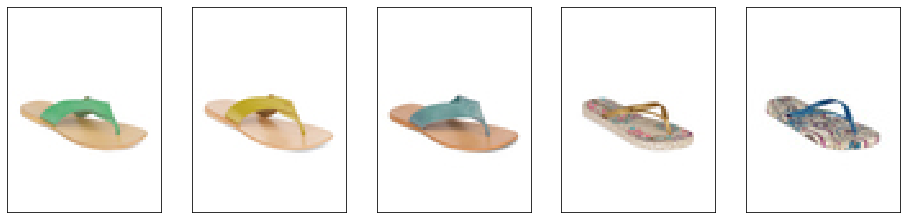

In [21]:
img_idx = utils.recommend_images(input_image, 5, pca_transf_train_images, pca_fit = pca_fit, cluster_fit = gmm_pca_fit)
imgs = [train_images[i] for i in img_idx]
utils.plot_images(imgs, nrows = 1, axis_style='on', figsize=(16,9))
plt.savefig("Outputs/test_output_%d.jpg"%idx)
plt.show()